In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
plt.gray()
from ipywidgets import interact, fixed
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:/Users/User/AppData/Local/NA-MIC/Slicer 5.0.3/Slicer.exe"
external_viewer.SetApplication(slicer_app_location)
%config Completer.use_jedi = False

<Figure size 432x288 with 0 Axes>

Part 1) Meta data embedding

a-

In [2]:
# read the data
img = sitk.ReadImage('C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\new_prostate.tif')

In [3]:
# view image in external viewer
external_viewer.Execute(img)

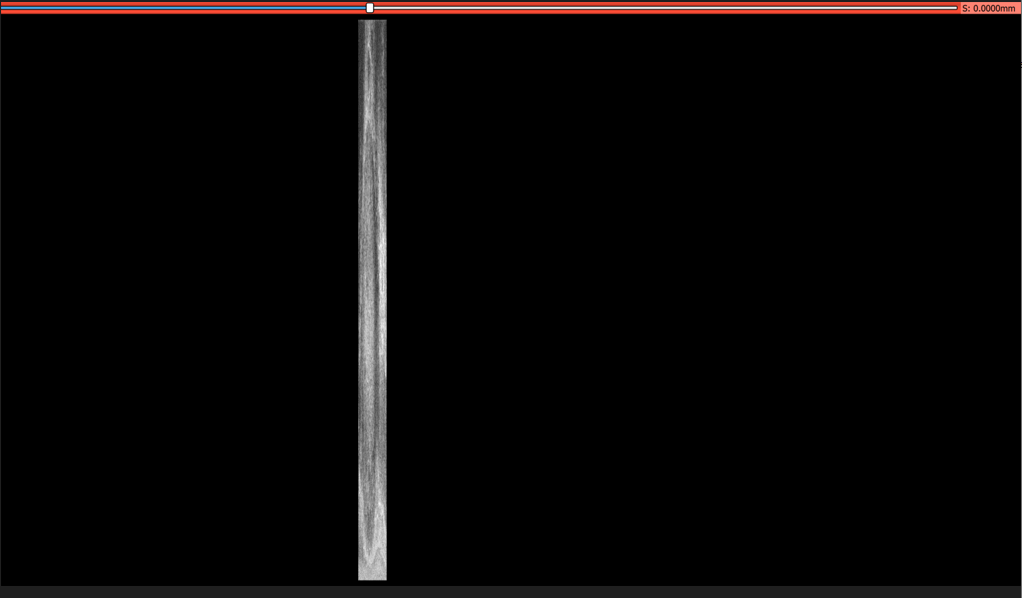

b-

In [4]:
import pandas as pd

df = pd.read_csv('C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\meta_data.csv')
print(df)

          data_name  axial (mm)  lateral (mm)  grade     organ    modality
0  PCC-0312_LAL_GS7          28         46.08      7  prostate  ultrasound


c-

The “axial” dimension - along the vertical axis - 28 mm.
“lateral” dimension - along the horizontal axis - 46.08 mm.


The lateral must be spaced more than the axial in order to be visible properly. So the ratio indicate the resolution. 


In [5]:
# get image meta data
print('size: ',img.GetSize())
print('origin: ',img.GetOrigin())
print('spacing: ',img.GetSpacing())
print('direction: ',img.GetDirection())
print('pixel type: ',img.GetPixelIDTypeAsString())
print('number of pixel components:',img.GetNumberOfComponentsPerPixel())

size:  (512, 10048)
origin:  (0.0, 0.0)
spacing:  (1.0, 1.0)
direction:  (1.0, 0.0, 0.0, 1.0)
pixel type:  8-bit unsigned integer
number of pixel components: 1


In [6]:
#calculate spacing, spacing is equal to physical_extent/size 

spacing_x = 46.08/512
spacing_y = 28/10048

print(spacing_x)
print(spacing_y)

0.09
0.002786624203821656


In [7]:
img.SetSpacing([0.0028, 0.09])

1-d)

In [75]:
#save image

sitk.WriteImage(img, 'C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\prostate_segment.tif')

In [ ]:

# view image in external viewer
external_viewer.Execute(img)

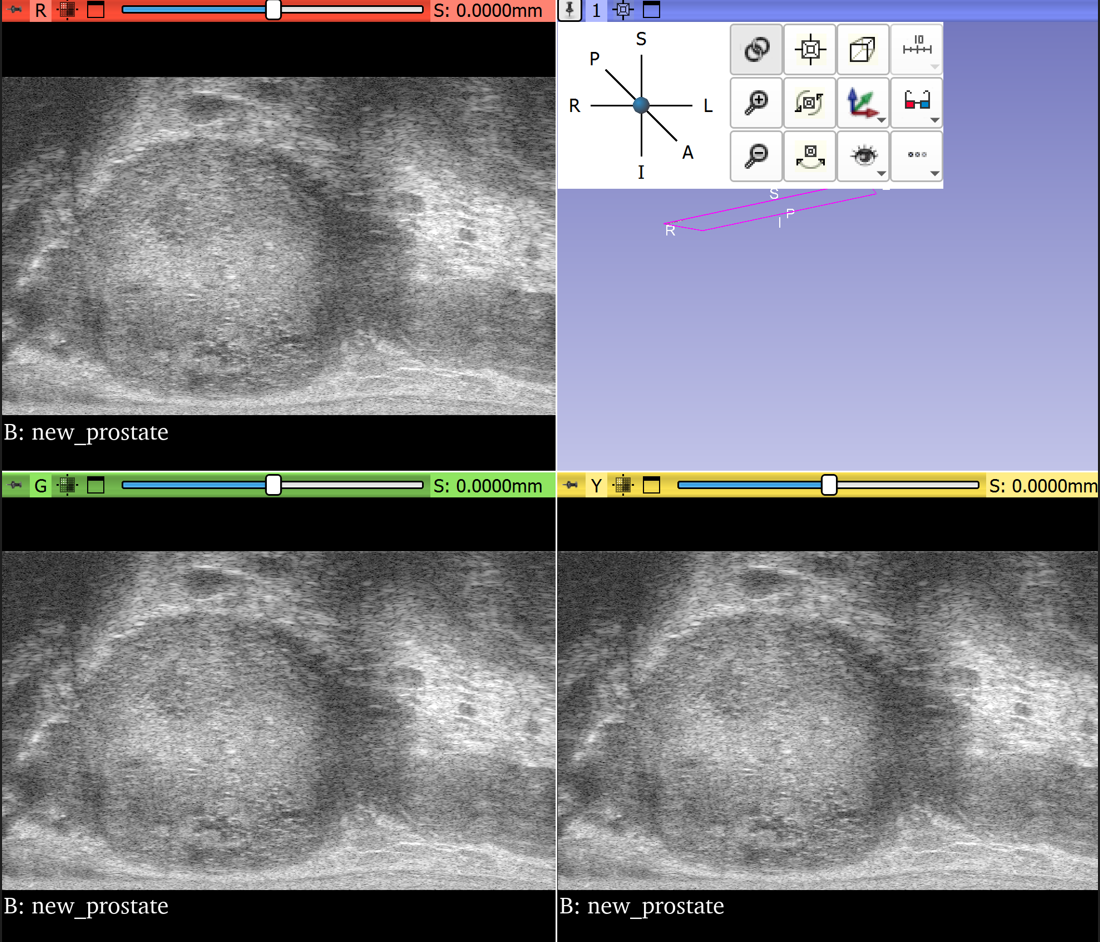

The pixels are well spaced in this picture so that it is almost square and visually clear as opposed to part 1 a where the picture was shrinked in width and long in height

1-e) 

In [9]:
# read the data
img_new_segment = sitk.ReadImage('C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\new_segemnt.tif')

In [ ]:
# view image in external viewer
external_viewer.Execute(img_new_segment)

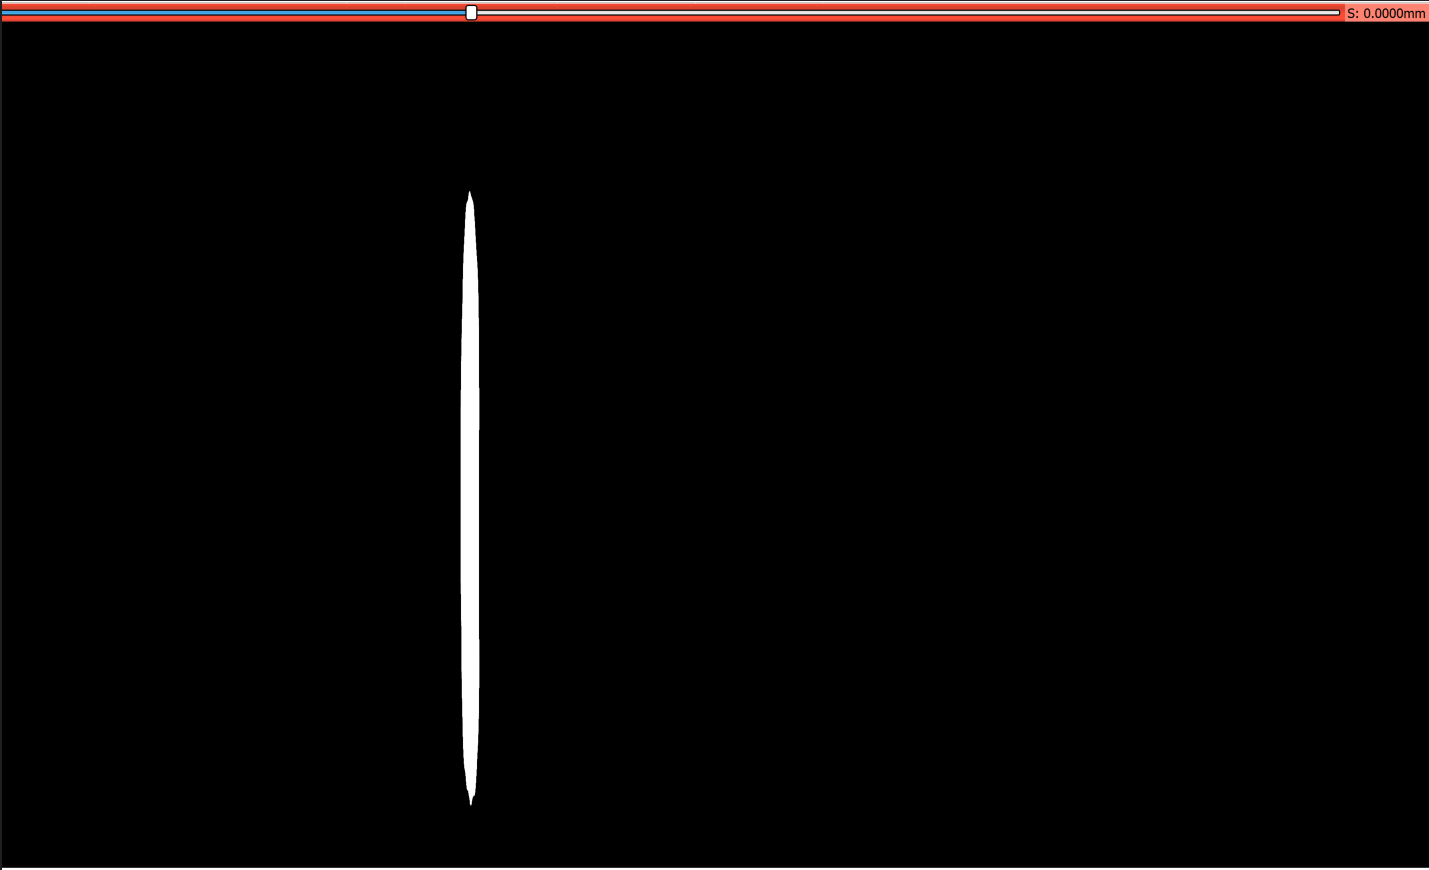

In [10]:
# get image meta data
print('size: ',img_new_segment.GetSize())
print('origin: ',img_new_segment.GetOrigin())
print('spacing: ',img_new_segment.GetSpacing())
print('direction: ',img_new_segment.GetDirection())
print('pixel type: ',img_new_segment.GetPixelIDTypeAsString())
print('number of pixel components:',img_new_segment.GetNumberOfComponentsPerPixel())

size:  (512, 10048)
origin:  (0.0, 0.0)
spacing:  (1.0, 1.0)
direction:  (1.0, 0.0, 0.0, 1.0)
pixel type:  8-bit unsigned integer
number of pixel components: 1


In [11]:
img_new_segment.SetSpacing([0.0028, 0.09])

In [12]:
#save image

sitk.WriteImage(img_new_segment, 'C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\new_segment.tif')

In [13]:
# view image in external viewer
external_viewer.Execute(img_new_segment)

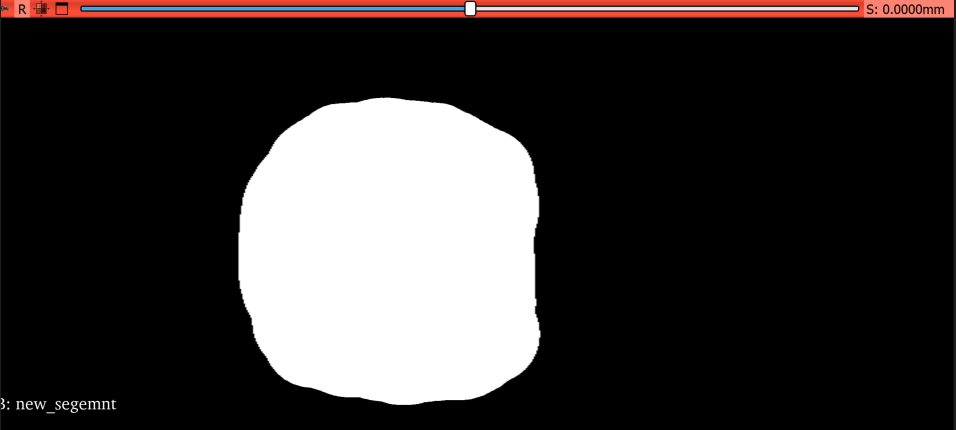

as compared to last image, this looks visually better as the pixels are spaced correctly in accord with the physical extent 

Part 2) Image enhancement

a-

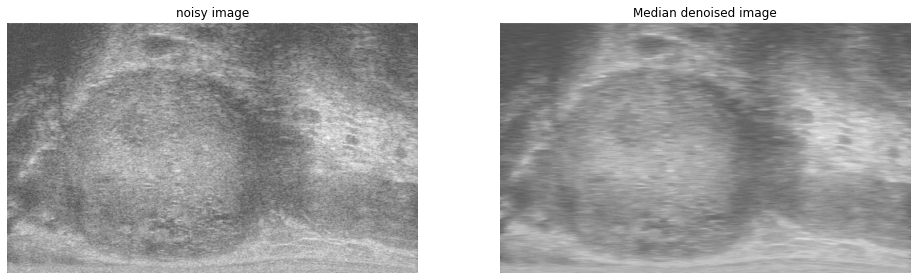

In [18]:
# read the data
img = sitk.ReadImage('C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment3\\prostate_segment.tif')
img.SetSpacing([0.0028, 0.09])
#Smooth prostate_ultrasound using Median filtering in SimpleITK
# median filter
median_filter = sitk.MedianImageFilter()


#trial number one


#Explore and visualize the result of using different kernel sizes to check its effect qualitatively. 

median_filter.SetRadius(5) ## kernel radius #

# The goal is to decrease the noise in the prostate image without losing important anatomical information (e.g., boundary of the prostate).

img_denoised = median_filter.Execute(img)

# visualize
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:]), vmin=0, vmax=255, extent=[0,46,0,28])
plt.axis('off')
plt.title('noisy image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255,extent=[0,46,0,28]) 
plt.axis('off')
plt.title('Median denoised image')
plt.show()

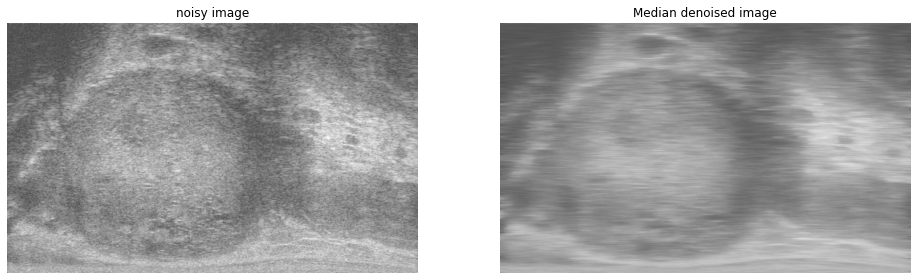

In [19]:
#trial number two
#Explore and visualize the result of using different kernel sizes to check its effect qualitatively. 

median_filter.SetRadius(10) ## kernel radius #

# The goal is to decrease the noise in the prostate image without losing important anatomical information (e.g., boundary of the prostate).

img_denoised = median_filter.Execute(img)

# visualize
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:]), vmin=0, vmax=255, extent=[0,46,0,28])
plt.axis('off')
plt.title('noisy image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255,extent=[0,46,0,28]) 
plt.axis('off')
plt.title('Median denoised image')
plt.show()

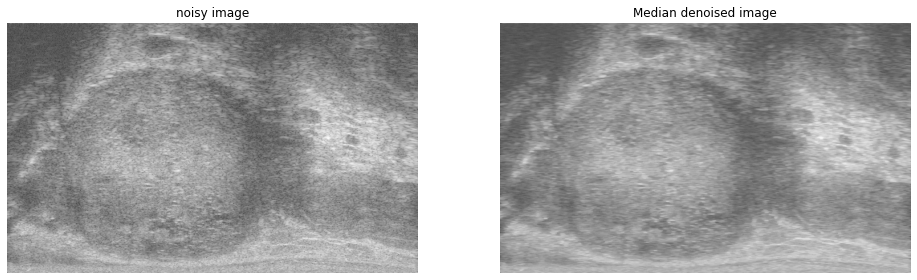

In [23]:
#trial number three
#Explore and visualize the result of using different kernel sizes to check its effect qualitatively. 

median_filter.SetRadius(2) ## kernel radius #

# The goal is to decrease the noise in the prostate image without losing important anatomical information (e.g., boundary of the prostate).

img_denoised = median_filter.Execute(img)

# visualize
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:]), vmin=0, vmax=255, extent=[0,46,0,28])
plt.axis('off')
plt.title('noisy image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255,extent=[0,46,0,28]) 
plt.axis('off')
plt.title('Median denoised image')
plt.show()


b-

(array([1.100000e+02, 3.523900e+04, 4.512800e+05, 8.237760e+05,
        1.286696e+06, 1.286886e+06, 8.561140e+05, 3.523160e+05,
        5.014000e+04, 2.019000e+03]),
 array([ 39. ,  60.4,  81.8, 103.2, 124.6, 146. , 167.4, 188.8, 210.2,
        231.6, 253. ]),
 <BarContainer object of 10 artists>)

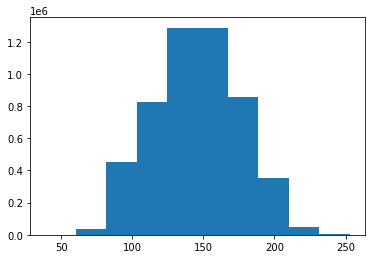

In [27]:
#Plot the histogram of the smoothed image
img_denoised_array = sitk.GetArrayFromImage(img_denoised)
plt.hist(img_denoised_array.flatten())


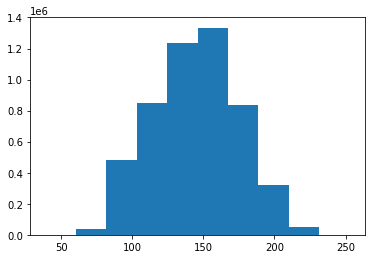

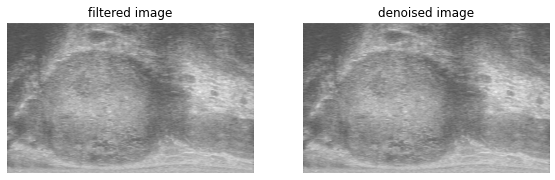

In [28]:
#Improve the contrast of the image by histogram equalization in SimpleITK using AdaptiveHistogramEqualizationImageFilter
histogram_equalization = sitk.AdaptiveHistogramEqualizationImageFilter()

#Explore different parameters and visualize the resultant image as well as its histogram. Choose the one that is qualitatively 
# more appealing.

#first trial

histogram_equalization.SetAlpha(1)
histogram_equalization.SetBeta(1)
histogram_equalization.SetRadius(5)

img_filtered = histogram_equalization.Execute(img_denoised)
img_filtered_array = sitk.GetArrayFromImage(img_filtered)
plt.hist(img_filtered_array.flatten())

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:]), vmin=0, vmax=255,extent=[0,46,0,28])
plt.axis('off')
plt.title('filtered image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255,extent=[0,46,0,28]) 
plt.axis('off')
plt.title('denoised image')
plt.show()

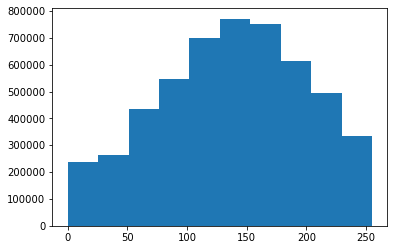

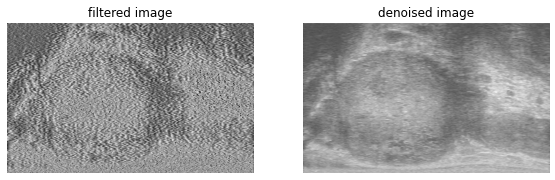

In [26]:
#Improve the contrast of the image by histogram equalization in SimpleITK using AdaptiveHistogramEqualizationImageFilter
histogram_equalization = sitk.AdaptiveHistogramEqualizationImageFilter()

#Explore different parameters and visualize the resultant image as well as its histogram. Choose the one that is qualitatively 
# more appealing.

#second trial

histogram_equalization.SetAlpha(0)
histogram_equalization.SetBeta(1)
histogram_equalization.SetRadius(5)

img_filtered = histogram_equalization.Execute(img_denoised)
img_filtered_array = sitk.GetArrayFromImage(img_filtered)
plt.hist(img_filtered_array.flatten())

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:]), vmin=0, vmax=255,extent=[0,46,0,28])
plt.axis('off')
plt.title('filtered image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255,extent=[0,46,0,28]) 
plt.axis('off')
plt.title('denoised image')
plt.show()

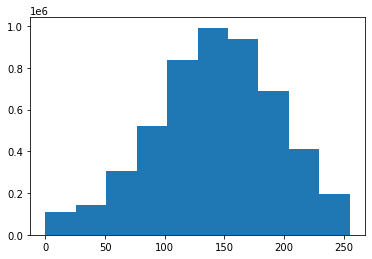

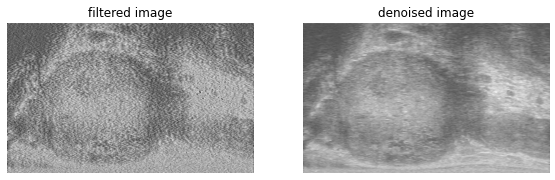

In [33]:
#third trial
histogram_equalization.SetAlpha(0)
histogram_equalization.SetBeta(1)
histogram_equalization.SetRadius(2)

img_filtered = histogram_equalization.Execute(img_denoised)
img_filtered_array = sitk.GetArrayFromImage(img_filtered)
plt.hist(img_filtered_array.flatten())

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:]), vmin=0, vmax=255,extent=[0,46,0,28])
plt.axis('off')
plt.title('filtered image')
plt.subplot(1,3,2)
plt.imshow(sitk.GetArrayFromImage(img_denoised[:,:]), vmin=0, vmax=255,extent=[0,46,0,28]) 
plt.axis('off')
plt.title('denoised image')
plt.show()

Part 3) Segmentation

3) a) range of pixel intensity

In [34]:
stats = sitk.StatisticsImageFilter()
stats.Execute(img)
print("min pixel value:",stats.GetMinimum())
print("max pixel value:",stats.GetMaximum())

min pixel value: 0.0
max pixel value: 255.0


3)b) 
F-1   : L- 12.308 P- 11.406 S- 0.000


F_1-1 : L- 21.191 P- 11.406 S- 0.000


F_2-1 : L- 12.447 P- 17.790 S- 0.000


F_3   : L- 22.301 P- 17.513 S- 0.000
     

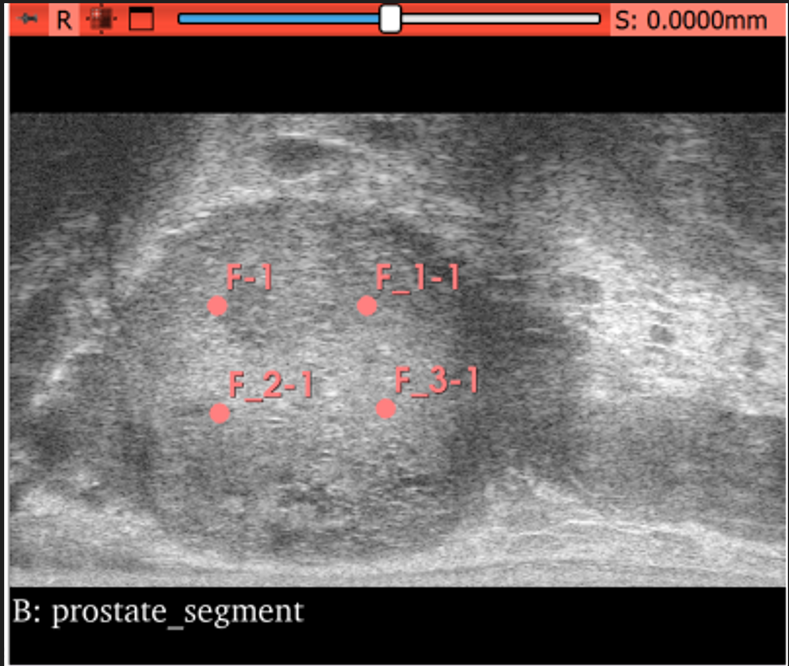

c-

In [35]:
i1= int(12.308/0.0028)
j1= int(11.406/0.09)
k1= int(1.000/1.000)

i2= int(21.191/0.0028)
j2= int(11.406/0.09)
k2= int(1.000/1.000)

i3= int(12.447/0.0028) 
j3= int(17.790/0.09)
k3= int(1.000/1.000)

i4= int(22.301/0.0028)  
j4= int(17.513/0.09)
k4= int(1.000/1.000)

In [36]:
seed1 = (i1, j1,k1)
seed2 = (i2, j2,k2)
seed3 = (i3, j3,k3)
seed4 = (i4, j4,k4)


In [42]:
seed_pts = [seed1,seed2,seed3,seed4]
seg = sitk.ConfidenceConnected(img_filtered, seedList=seed_pts,
                                   numberOfIterations=1,
                                   multiplier=2.5,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

d-

1-d

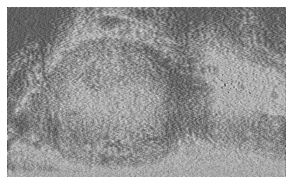

In [44]:
#adjust seg spacing
seg.SetSpacing((0.09, 0.0028))
img_filtered.SetSpacing((0.09, 0.0028))
# overlay the mask
img_overlay = sitk.LabelOverlay(img_filtered, seg)

plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayFromImage(img_overlay),extent=[0,46,0,28])
plt.axis('off')
plt.show()

Part 4) Deriving Prostate Information

In [45]:
import math
#a. Calculate the area of prostate cross section in mm2 
# (use the spacing information and the number of pixels in the prostate segemnt).

new_segment_spacing = img_new_segment.GetSpacing()
new_segment_size = img_new_segment.GetSize()

physical_extent_x = new_segment_spacing[0] *new_segment_size[0]
physical_extent_y = new_segment_spacing[1] *new_segment_size[1]

Area = physical_extent_x * physical_extent_y
print("area is:",Area,"mm2")


#b. The shape of the prostate in the 3D space is often approximated by an ellipsoid. 
# The volume of an ellipsoid can be calculated as:
#𝑉=43Ac  where A and c are the area of the 2D cross section and 
# the radius in third dimension respectively. 
# Calculate the volume of the prostate in CC, by assuming the third radius is
# c = 15 mm

c = 15
Volume = (4/3)* Area * c
print("Volume is:",Volume, "mm3")

#c. Calculate the mean and standard deviation of the pixel intensities
# of the main image inside the prostate region.
stats = sitk.StatisticsImageFilter()
stats.Execute(img_new_segment)
print("mean of the pixel intensities:",stats.GetMean())
print("standard deviation of the pixel intensities:",math.sqrt(stats.GetVariance()))


area is: 1296.4331519999998 mm2
Volume is: 25928.663039999996 mm3
mean of the pixel intensities: 71.57778211459993
standard deviation of the pixel intensities: 114.58166563101562
